In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
import seaborn as sns

alg_name:  UCRL2 mean reward:  31927830.1 std:  4547828.762508599
alg_name:  UCRL2-VTR mean reward:  23883650.6 std:  7008596.070202851
alg_name:  LSVI-DC(linear_mixture) mean reward:  3876857.9634999223 std:  125078.11891891828
alg_name:  Optimal Policy mean reward:  35184307.6 std:  242264.16594626618


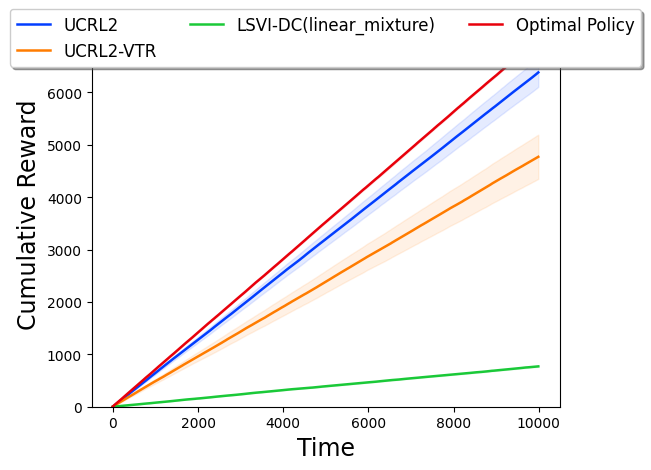

In [9]:
# Experiments Information

# the number of states
nState = 2
# the number of rounds
T = 10000
# smoothing factor
# N = int(K/10)
N=10
# N = 5


def running_mean(x, N):
    cumsum = np.cumsum(x, axis=1) 
    return (cumsum[:,N:] - cumsum[:,:-N]) / N

# algo_list = ['Optimal Policy', 'LSVI-UCB', 'LSVI-PHE', 'UC-MatrixRL', 'UCRL-VTR', 'UCRL-MNL']
algo_list = ['UCRL2', 'UCRL2-VTR', 'LSVI-DC(linear_mixture)', 'Optimal Policy']
# colors = sns.color_palette('colorblind', n_colors=len(algo_list))
colors = sns.color_palette('bright', n_colors=len(algo_list))


plt.figure()
for i in range(len(algo_list)):
    
    directory = './data/hardtolearn/S=' + str(nState)+ ', T=' + str(T) +'/' + str(algo_list[i])
    file_list = listdir(directory)
    if '.DS_Store' in file_list:
        file_list.remove('.DS_Store')
    if '.ipynb_checkpoints' in file_list:
        file_list.remove('.ipynb_checkpoints')

    
        
    algo_returns = []
    for j in range(len(file_list)):
        r = np.load(directory + '/' + file_list[j], allow_pickle=True)
        algo_returns.append(r)
#     data_mean = np.mean(algo_returns, axis=0)
#     data_std = np.std(algo_returns, axis=0)
    data_mean = np.mean(running_mean(algo_returns, N), axis=0)
    data_std = np.std(running_mean(algo_returns, N), axis=0)    
    
    episodes = np.arange(len(data_mean))

    plt.rc('font', size=10)        # 기본 폰트 크기
    plt.rc('axes', labelsize=17)   # x,y축 label 폰트 크기
    plt.rc('xtick', labelsize=10)  # x축 눈금 폰트 크기 
    plt.rc('ytick', labelsize=10)  # y축 눈금 폰트 크기
    plt.rc('legend', fontsize=12)  # 범례 폰트 크기
    # plt.rc('figure', titlesize=50) # figure title 폰트 크기

    plt.fill_between(episodes, data_mean + 0.3 * data_std, data_mean - 0.3 * data_std, alpha=0.1, edgecolor=colors[i],
                facecolor=colors[i])
    plt.plot(episodes, data_mean, color=colors[i], linewidth=1.8, label=algo_list[i])
    
    print("alg_name: ", algo_list[i], "mean reward: ", np.mean(np.sum(algo_returns, axis=1)),
          "std: ", np.std(np.sum(algo_returns, axis=1)))
    
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05),
           fancybox=True, shadow=True, ncol=3)

plt.xlabel("Time")
plt.ylabel("Cumulative Reward")
plt.ylim(0)
plt.tight_layout()
plt.savefig('./S=' + str(nState) + '(Hard-to-learn, Rewards)' + '.pdf', dpi=300)  # format.pdf
plt.show()

alg_name:  UCMLK mean reward:  61854.9 std:  7202.980444926948
alg_name:  UCRL2-VTR mean reward:  51863.5 std:  27051.800905854678
alg_name:  UCRL2 mean reward:  52425.6 std:  29030.21365129785


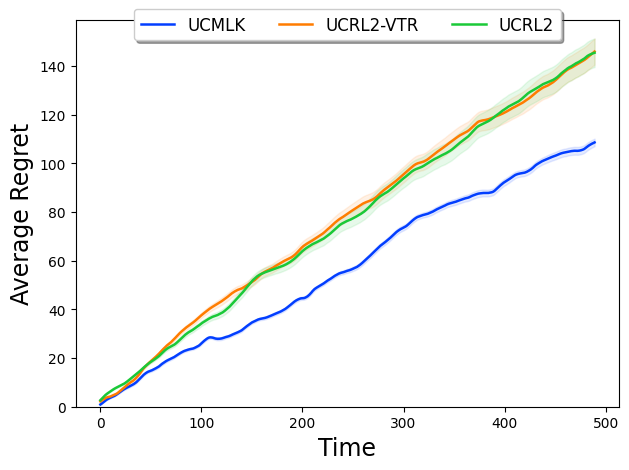

In [6]:
# Experiments Information

# the number of states
nState = 6
# the number of rounds
T = 10000
# smoothing factor
# N = int(K/10)
N=10
# N = 5


def running_mean(x, N):
    cumsum = np.cumsum(x, axis=1) 
    return (cumsum[:,N:] - cumsum[:,:-N]) / N

# algo_list = ['Optimal Policy', 'LSVI-UCB', 'LSVI-PHE', 'UC-MatrixRL', 'UCRL-VTR', 'UCRL-MNL']
algo_list = ['UCMLK', 'UCRL2-VTR', "UCRL2"]
# colors = sns.color_palette('colorblind', n_colors=len(algo_list))
colors = sns.color_palette('bright', n_colors=len(algo_list))


directory = './data/hardtolearn/S=' + str(nState)+ ', T=' + str(T) +'/' + str("Optimal Policy")
file_list = listdir(directory)
if '.DS_Store' in file_list:
    file_list.remove('.DS_Store')
if '.ipynb_checkpoints' in file_list:
    file_list.remove('.ipynb_checkpoints')

opt_returns = []
for j in range(len(file_list)):
    r = np.load(directory + '/' + file_list[j], allow_pickle=True)
    opt_returns.append(r)

plt.figure()
for i in range(len(algo_list)):    
    directory = './data/hardtolearn/S=' + str(nState)+ ', T=' + str(T) +'/' + str(algo_list[i])
    file_list = listdir(directory)
    if '.DS_Store' in file_list:
        file_list.remove('.DS_Store')
    if '.ipynb_checkpoints' in file_list:
        file_list.remove('.ipynb_checkpoints')

    algo_returns = []
    for j in range(len(file_list)):
        r = np.load(directory + '/' + file_list[j], allow_pickle=True)
        algo_returns.append(r)

    reg = np.array(opt_returns) - np.array(algo_returns)
    # print(len(algo_returns))
#     data_mean = np.mean(algo_returns, axis=0)
#     data_std = np.std(algo_returns, axis=0)
    
    data_mean = np.mean(running_mean(reg, N), axis=0)
    data_std = np.std(running_mean(reg, N), axis=0)    
    
    episodes = np.arange(len(data_mean))

    plt.rc('font', size=10)        # 기본 폰트 크기
    plt.rc('axes', labelsize=17)   # x,y축 label 폰트 크기
    plt.rc('xtick', labelsize=10)  # x축 눈금 폰트 크기 
    plt.rc('ytick', labelsize=10)  # y축 눈금 폰트 크기
    plt.rc('legend', fontsize=12)  # 범례 폰트 크기
    # plt.rc('figure', titlesize=50) # figure title 폰트 크기

    plt.fill_between(episodes, data_mean + 0.05*data_std, data_mean - 0.05*data_std, alpha=0.1, edgecolor=colors[i], facecolor=colors[i])
    plt.plot(episodes, data_mean, color=colors[i], linewidth=1.8, label=algo_list[i])
    
    print("alg_name: ", algo_list[i], "mean reward: ", np.mean(np.sum(algo_returns, axis=1)),
          "std: ", np.std(np.sum(algo_returns, axis=1)))
    
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1, 2]
plt.legend([handles[i] for i in order], [labels[i] for i in order], loc='upper center', bbox_to_anchor=(0.5, 1.05),
          fancybox=True, shadow=True, ncol=3)
# plt.legend()
# plt.title("Hard-to-learn: State=" + str(nState) + ", T=" + str(T), y=-0.3)
plt.xlabel("Time")
plt.ylabel("Average Regret")
plt.ylim(0)
# plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('./S=' + str(nState) + '(Hard-to-learn, Regret)'+'.pdf')
# plt.savefig('./S=' + str(nState) + '_ns.pdf')
plt.show()